In [7]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt

In [26]:
housing_dataset = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing_dataset.data, housing_dataset.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)


In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [34]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=[x_valid, y_valid])

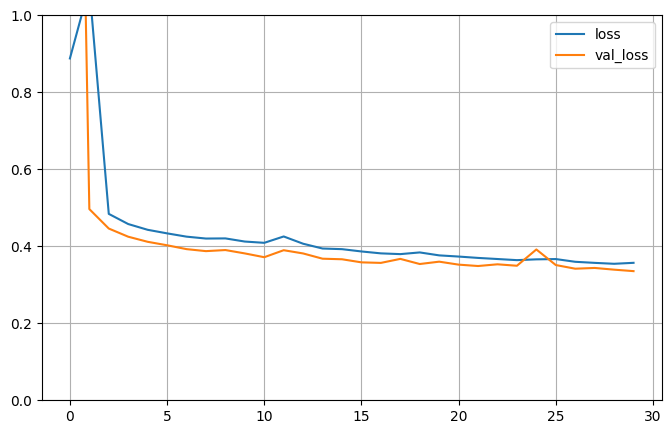

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
se_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 3.3949
